
Processing file: corrected_rainfall_2022-07.tif
File properties:
Bounds: BoundingBox(left=76.5, bottom=28.4, right=77.5, top=28.9)
CRS: EPSG:4326
Transform: | 0.10, 0.00, 76.50|
| 0.00,-0.10, 28.90|
| 0.00, 0.00, 1.00|
Shape: (5, 10)


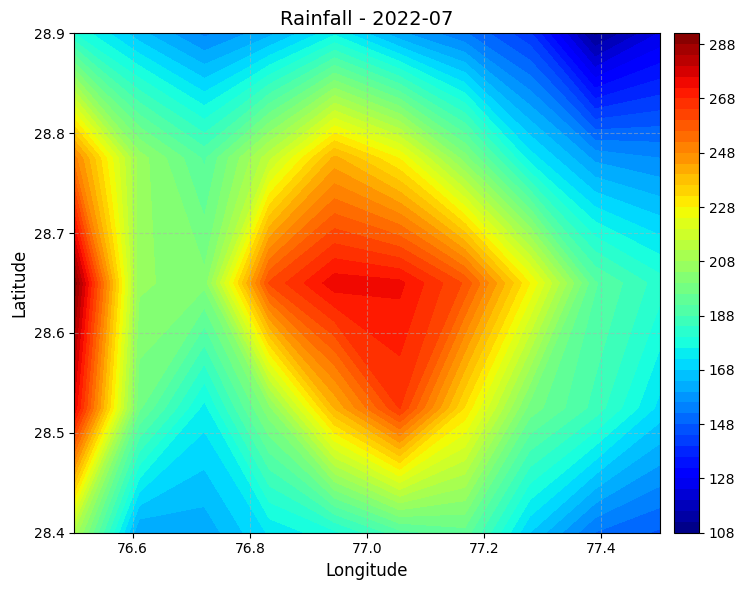

In [11]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import os

# Define a function to process and display a single GeoTIFF file
def process_and_display_tif(file_path):
    # Extract date from filepath
    filename = os.path.basename(file_path)
    date_str = filename.split('_')[-1].split('.')[0]
    
    print(f"\nProcessing file: {filename}")
    
    # Open the GeoTIFF file
    with rasterio.open(file_path) as src:
        # Read the first (or only) band
        rainfall_data = src.read(1)
        
        # Get geographical extents for accurate plotting
        bounds = src.bounds
        transform = src.transform
        
        # Calculate the extent for the plot
        extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]
        
        # Print file properties
        print(f"File properties:")
        print(f"Bounds: {bounds}")
        print(f"CRS: {src.crs}")
        print(f"Transform: {transform}")
        print(f"Shape: {src.shape}")
        
        # Mask invalid values (e.g., nodata)
        rainfall_data = np.ma.masked_equal(rainfall_data, src.nodata if src.nodata is not None else 0)
    
    # Plot the data
    plt.figure(figsize=(8, 6))
    plt.contourf(
        np.linspace(extent[0], extent[1], rainfall_data.shape[1]),
        np.linspace(extent[3], extent[2], rainfall_data.shape[0]),
        rainfall_data,
        levels=50,
        cmap='jet'
    )
    
    # Add colorbar and labels
    plt.colorbar(label='', orientation='vertical', pad=0.02)
    plt.title(f"Rainfall - {date_str}", fontsize=14)
    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitude', fontsize=12)
    plt.grid(visible=True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


# Define file paths (example usage)
file_paths = [
    # "/home/stormej/dev/rainscale/data/rain/rain_tif_monthly/monthly_rain_2022_07.tif" ## Original IMD Data
    # "/home/stormej/dev/rainscale/data/bias_corrected/bias_corrected_kriging_0.01/corrected_rainfall_2022-07.tif", ## Downscaled Bias Corrected Kriging 1 km
    # "/home/stormej/dev/rainscale/data/bias_corrected/bias_corrected_kriging_0.1/corrected_rainfall_2022-07.tif", ## Downscaled Bias Corrected Kriging 10 km
    #"/home/stormej/dev/rainscale/data/bias_corrected/bias_corrected_bilinear_0.01/corrected_rainfall_2022-07.tif" ## Downscaled Bias Corrected Bilinear 1 km,
    "/home/stormej/dev/rainscale/data/bias_corrected/bias_corrected_bilinear_0.1/corrected_rainfall_2022-07.tif" ## Downscaled Bias Corrected Bilinear 10 km
  
    # Add more file paths here
]

# Allow user input for additional file paths
# Process each file
for file_path in file_paths:
    if os.path.exists(file_path):
        process_and_display_tif(file_path)
    else:
        print(f"File not found: {file_path}")